In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/home/abdul/External Project/llm-ml-finance-dashboard/all_stocks_5yr.csv')

In [4]:
df.tail(2000)

,date,open,high,low,close,volume,Name
617040,2015-03-03,26.76,27.16,26.76,27.000,3237735,ZION
617041,2015-03-04,27.02,27.24,26.69,27.235,3223229,ZION
617042,2015-03-05,27.35,27.45,26.88,27.420,2328800,ZION
617043,2015-03-06,26.84,27.75,26.84,27.340,4850307,ZION
617044,2015-03-09,27.33,27.59,27.22,27.460,1727586,ZION
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.820,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.780,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.830,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.270,4924323,ZTS


In [5]:
df.shape

(619040, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [7]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [8]:
df.isnull().sum()
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  object 
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   close   619029 non-null  float64
 5   volume  619029 non-null  int64  
 6   Name    619029 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


<AxesSubplot:xlabel='close'>

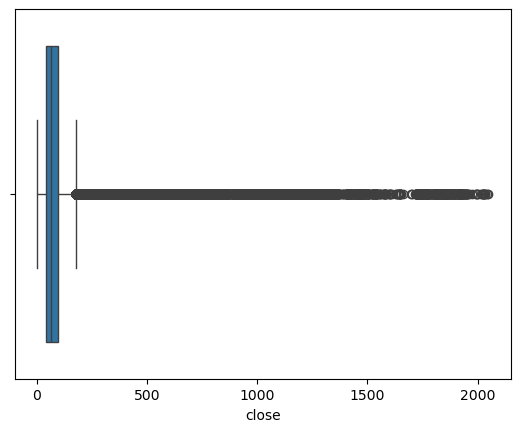

In [11]:
sns.boxplot(x=df['close'])


<AxesSubplot:xlabel='log_close'>

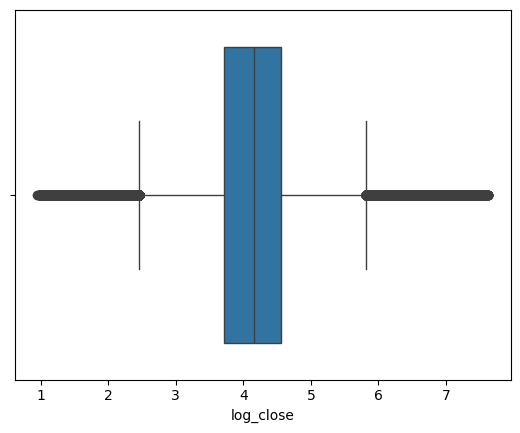

In [12]:
import numpy as np
df['log_close'] = np.log1p(df['close'])

# Visualize transformed
sns.boxplot(x=df['log_close'])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619029 entries, 0 to 619039
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       619029 non-null  object 
 1   open       619029 non-null  float64
 2   high       619029 non-null  float64
 3   low        619029 non-null  float64
 4   close      619029 non-null  float64
 5   volume     619029 non-null  int64  
 6   Name       619029 non-null  object 
 7   log_close  619029 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 42.5+ MB


In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df.head()

,date,open,high,low,close,volume,Name,log_close
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2.756840
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2.738256
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2.725890
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.751110
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2.707383


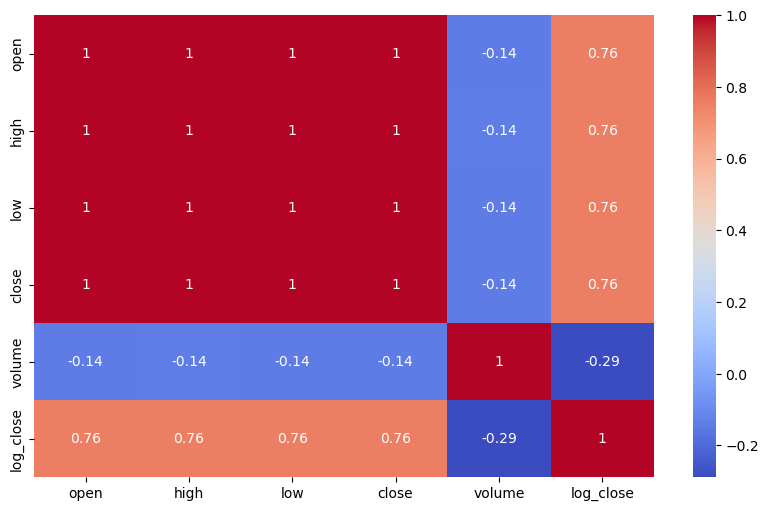

In [16]:
numeric_df = df.select_dtypes(include='number')

# Generate correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:title={'center':'Close Price Over Time'}, xlabel='date'>

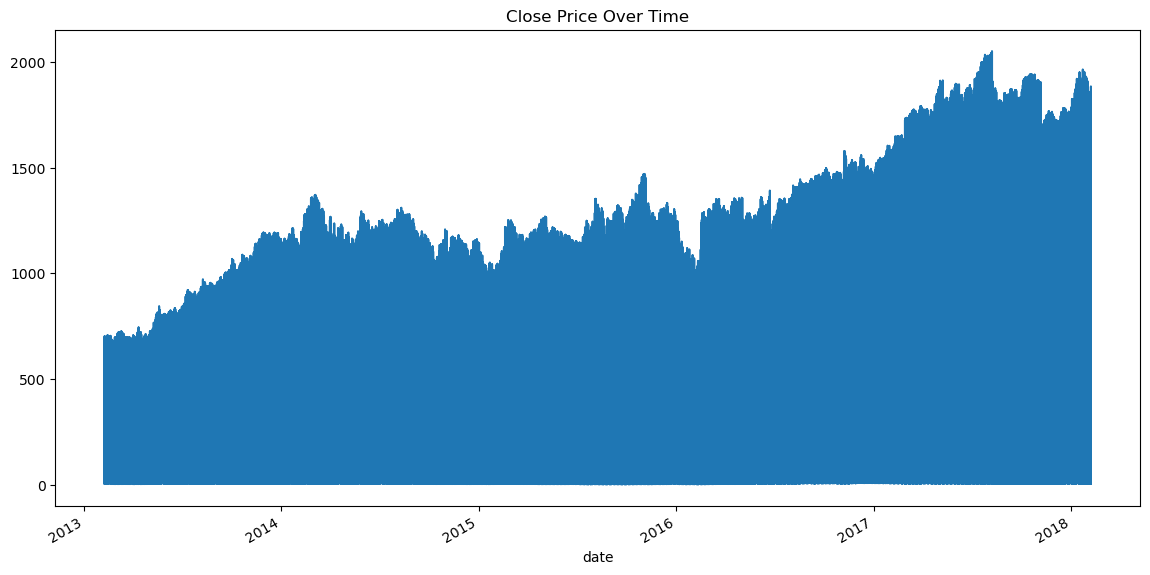

In [17]:
df.set_index('date')['close'].plot(figsize=(14, 7), title='Close Price Over Time')

In [18]:
Q1 = df['close'].quantile(0.25)
Q3 = df['close'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['close'] < (Q1 - 1.5 * IQR)) | (df['close'] > (Q3 + 1.5 * IQR))]


In [19]:
outliers

,date,open,high,low,close,volume,Name,log_close
2456,2017-11-08,174.66,176.240,174.3300,176.24,24409527,AAPL,5.177505
2457,2017-11-09,175.11,176.095,173.1400,175.88,29185668,AAPL,5.175472
2483,2017-12-18,174.88,177.200,174.8600,176.42,29421114,AAPL,5.178520
2500,2018-01-12,176.18,177.360,175.6500,177.09,25418080,AAPL,5.182289
2501,2018-01-16,177.90,179.390,176.1400,176.19,29565947,AAPL,5.177223
...,...,...,...,...,...,...,...,...
601402,2018-01-23,196.94,201.690,194.5901,194.95,4261754,WYNN,5.277860
601403,2018-01-24,196.88,201.970,194.2000,200.58,3248360,WYNN,5.306186
601404,2018-01-25,200.75,203.630,198.1600,200.60,3491113,WYNN,5.306286
601405,2018-01-26,201.99,201.990,178.0400,180.29,22145560,WYNN,5.200098


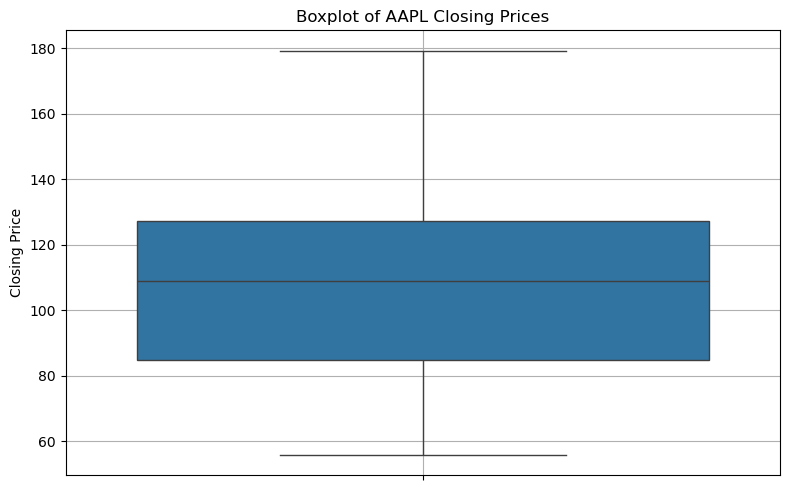

In [20]:
df = pd.read_csv("all_stocks_5yr.csv")

# Filter for Apple stock
aapl_df = df[df['Name'] == 'AAPL']

# Create boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y='close', data=aapl_df)
plt.title('Boxplot of AAPL Closing Prices')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
df['log_close'] = np.log1p(df['close'])

In [27]:
df_outliers_cleaned_on_close = df

In [28]:
df_2 = pd.DataFrame(df_outliers_cleaned_on_close)

Feature Engineering

In [23]:
#price_range         high - low	                    Measures daily volatility
#price_change        close - open	                Measures gain/loss during the day
#%change_close	    (close - open) / open * 100	    Normalized daily return
#rolling_avg_7	    close.rolling(7).mean()	        Weekly trend
#rolling_std_7	    close.rolling(7).std()	        Weekly volatility
#log_volume	        np.log1p(volume)	            Stabilizes skewed volume distribution

In [29]:
df_2.head()

,date,open,high,low,close,volume,Name,log_close
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2.756840
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2.738256
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2.725890
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.751110
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2.707383


In [30]:
df_2["price_range"] = df_2["high"] - df_2["low"]
df_2["price_change"] = df_2["close"] - df_2["open"]
df_2["percent_change_close"] = (df_2["close"] - df_2["open"]) / df_2["open"] * 100
df_2["rolling_avg_7"] = df_2["close"].rolling(7).mean()
df_2["rolling_std_7"] = df_2["close"].rolling(7).std()
df_2["log_volume"] = np.log1p(df_2["volume"])

In [32]:
df_2.head()

,date,open,high,low,close,volume,Name,log_close,price_range,price_change,percent_change_close,rolling_avg_7,rolling_std_7,log_volume
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2.756840,0.49,-0.32,-2.123424,NaN,NaN,15.944635
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2.738256,0.75,-0.43,-2.887844,NaN,NaN,15.999537
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2.725890,0.41,-0.18,-1.245675,NaN,NaN,15.910579
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.751110,0.69,0.36,2.517483,NaN,NaN,16.143715
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2.707383,1.80,-0.95,-6.358768,NaN,NaN,17.277486


In [35]:
df_2.dropna(inplace=True)

In [37]:
df_2.head()

,date,open,high,low,close,volume,Name,log_close,price_range,price_change,percent_change_close,rolling_avg_7,rolling_std_7,log_volume
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,2.725235,0.48,-0.07,-0.488486,14.412857,0.260494,16.245116
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL,2.662355,1.11,-0.84,-5.928017,14.210000,0.443095,16.505071
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL,2.665143,1.05,-0.25,-1.835536,14.054286,0.524622,16.293904
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL,2.678965,0.39,0.00,0.000000,13.954286,0.543043,15.619100
10,2013-02-25,13.60,13.76,13.00,13.02,7186400,AAL,2.640485,0.76,-0.58,-4.264706,13.720000,0.541603,15.787701


In [38]:
df_cleaned = df_2.to_csv("all_stocks_5yr_cleaned.csv", index=False)

ML Preparation

In [46]:
df_cleaned = pd.read_csv("all_stocks_5yr_cleaned.csv")

In [47]:
df_cleaned.head()

,date,open,high,low,close,volume,Name,log_close,price_range,price_change,percent_change_close,rolling_avg_7,rolling_std_7,log_volume
0,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,2.725235,0.48,-0.07,-0.488486,14.412857,0.260494,16.245116
1,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL,2.662355,1.11,-0.84,-5.928017,14.210000,0.443095,16.505071
2,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL,2.665143,1.05,-0.25,-1.835536,14.054286,0.524622,16.293904
3,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL,2.678965,0.39,0.00,0.000000,13.954286,0.543043,15.619100
4,2013-02-25,13.60,13.76,13.00,13.02,7186400,AAL,2.640485,0.76,-0.58,-4.264706,13.720000,0.541603,15.787701


In [48]:
features = ['open', 'high', 'low', 'volume', 'price_change', 'rolling_avg_7', 'log_volume']
target = 'close'

In [49]:
X = df_cleaned[features]
y = df_cleaned[target]

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
